# Общий обзор игроков foodtech 

В данной работе мы ознакомимся с трендами российского foodtech рынка, чтобы ориентироваться в пользовательских предпочтениях 2021 года. Сравним мобильные приложения в App Store и вебсайты по ряду параметров и выявим закономерности в поведении клиентов, если такие существуют.

### Подключение библиотек и скриптов

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

import matplotlib.image as img
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams.update({'font.size': 14})
#plt.style.available

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#### Пути к директориям и файлам

In [4]:
DATASET_PATH = '../data/foodtech_market.csv'

### Загрузка данных

#### Описание датасета

* **title** - название магазина / агрегатора доставок
* **site** - ссылка на сайт
* **mau** - количество трафика сайта за месяц через SimilarWeb
* **mobile_version** - наличие мобильного приложения в Appstore
* **app_store_rating** -  рейтинг мобильного приложении на 13 января 2021 в Appstore
* **users_review** - сумма оценок пользователей приложению в App Store
* **app_store_category** - номер в рейтинге категории "Food & Drink"

In [5]:
df = pd.read_csv(DATASET_PATH)
df

,name,site,mau,mobile_version,app_store_rating,users_review,app_store_category
0,group 1,NaN,NaN,NaN,NaN,NaN,NaN
1,Вкусвилл,https://vkusvill.ru/,2M,yes,4.7,25000.0,10.0
2,Утконос,https://www.utkonos.ru/,2.4M,yes,4.7,12500.0,38.0
3,Перекресток,https://my.perekrestok.ru/,457.6K,yes,4.7,68000.0,4.0
4,Перекресток Впрок,https://vprok.ru/,NaN,yes,4.8,34000.0,16.0
5,Азбука вкуса,https://av.ru/,637.3K,yes,3.4,1300.0,75.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,group 2,NaN,NaN,NaN,NaN,NaN,NaN
8,Глобус,https://www.globus.ru/,1.1M,yes,4.4,4800.0,26.0
9,Мираторг,https://shop.miratorg.ru/,263.8K,yes,1.5,806.0,140.0


In [6]:
df.dtypes

name                   object
site                   object
mau                    object
mobile_version         object
app_store_rating      float64
users_review          float64
app_store_category    float64
dtype: object

### Приведение типов

**id**

Добавляем индекс **id**

In [7]:
df['id'] = df.index.tolist()
df.set_index('id', inplace=True)

### Обзор данных

В [google-таблице](https://docs.google.com/spreadsheets/d/1OcUXqT4kfI656y7atLKoBvV14fQjWey3I50TmnHzzzA/edit#gid=0) я разбила компании по **сегментам**:  
 * **high_middle_shops** - магазины с широким ассортиментом товаров средней и выше средней ценовой категории, эко-продуктами
 * **econom_shops** - магазины эконом сегмента
 * **fast_product_delivery** - магазины, dark kitchen, агрегаторы доставок, которые быстро доставляют продукты или готовые блюда

Сейчас эти сегменты находятся в строках над соотвествующей группой.  
Я хочу удалить эти признаки из строк, чтобы можно было работать с данными. Создам новый столбец, обозначу каждый сегмент и добавлю к соответствующим магазинам и сервисам.

In [8]:
df = df.drop([0, 6, 7, 14, 15]) 

In [9]:
df

,name,site,mau,mobile_version,app_store_rating,users_review,app_store_category
id,,,,,,,
1,Вкусвилл,https://vkusvill.ru/,2M,yes,4.7,25000.0,10.0
2,Утконос,https://www.utkonos.ru/,2.4M,yes,4.7,12500.0,38.0
3,Перекресток,https://my.perekrestok.ru/,457.6K,yes,4.7,68000.0,4.0
4,Перекресток Впрок,https://vprok.ru/,NaN,yes,4.8,34000.0,16.0
5,Азбука вкуса,https://av.ru/,637.3K,yes,3.4,1300.0,75.0
8,Глобус,https://www.globus.ru/,1.1M,yes,4.4,4800.0,26.0
9,Мираторг,https://shop.miratorg.ru/,263.8K,yes,1.5,806.0,140.0
10,Пятерочка,https://5ka.ru/,5.2M,yes,4.2,11000.0,3.0
11,Пятерочка Доставка,https://5-delivery.ru/,101.5K,yes,4.6,9000.0,8.0


Отлично, лишние строки удалены

Теперь вводим дополнительный столбец категория магазина/сервиса - **segment**

In [10]:
df['segment'] = ['high_middle_shops'] * 5 + ['econom_shops'] * 6 + ['fast_product_delivery'] * 6

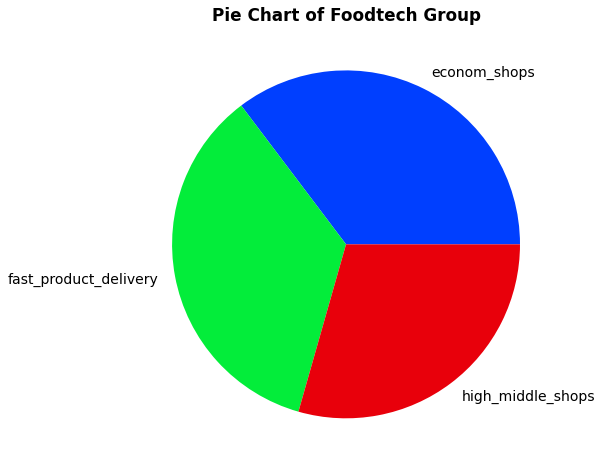

In [11]:
df.groupby('segment').size().plot(kind='pie', subplots=True, figsize=(8, 8))
            
plt.title("Pie Chart of Foodtech Group", weight='bold')
plt.ylabel("")
plt.show()

Теперь можем удалить столбец **mobile_version**, так как у всех магазинов есть мобильное приложение

In [12]:
df = df.drop(['mobile_version'], axis = 1)

Посмотрим что получилось:

In [13]:
df[:5]

,name,site,mau,app_store_rating,users_review,app_store_category,segment
id,,,,,,,
1,Вкусвилл,https://vkusvill.ru/,2M,4.7,25000.0,10.0,high_middle_shops
2,Утконос,https://www.utkonos.ru/,2.4M,4.7,12500.0,38.0,high_middle_shops
3,Перекресток,https://my.perekrestok.ru/,457.6K,4.7,68000.0,4.0,high_middle_shops
4,Перекресток Впрок,https://vprok.ru/,NaN,4.8,34000.0,16.0,high_middle_shops
5,Азбука вкуса,https://av.ru/,637.3K,3.4,1300.0,75.0,high_middle_shops


In [14]:
df.shape

(17, 7)

**Итак, у нас 17 магазинов для анализа и 7 параметров**

В таблице **[google-таблице](https://docs.google.com/spreadsheets/d/1OcUXqT4kfI656y7atLKoBvV14fQjWey3I50TmnHzzzA/edit#gid=0)** я выделила красным цветом те сервисы, у которых есть сайт, но на нем ***нельзя сделать заказ***.  

Это следующие магазины / сервисы:
* **Перекресток**
* **Пятерочка**
* **Пятерочка Доставка**
* **Магнит**
* **Лента**
* **Лавка**
* **Самокат**
* **Кухня на районе**

Я добавлю новый столбец **possibility_of_order** - возможность заказа, чтобы мы знали, в каком магазине мы можем сделать заказ через сайт, а в каком нет.  
По умолчанию вношу параметр 'order' - возможность заказа

In [15]:
df['possibility_of_order'] = 'order'

Там, где нельзя сделать заказ будет признак **no_order**  
Для этого создаем отдельную группу **shops_no_order** и добавляем в нее те магазины, откуда нельзя заказать онлайн

In [16]:
shops_no_order = [
    'Перекресток',
    'Пятерочка',
    'Пятерочка Доставка',
    'Магнит',
    'Лента',
    'Лавка',
    'Самокат',
    'Кухня на районе',
]

In [17]:
df.loc[df['name'].isin(shops_no_order), 'possibility_of_order'] = 'no_order'

Посмотрим, что получилось

In [18]:
df.tail()

,name,site,mau,app_store_rating,users_review,app_store_category,segment,possibility_of_order
id,,,,,,,,
17,Самокат,https://samokat.ru/,187.2K,4.9,73000.0,7.0,fast_product_delivery,no_order
18,Кухня на районе,https://localkitchen.ru/,51.6K,4.7,15000.0,19.0,fast_product_delivery,no_order
19,ЯЕда,https://eda.yandex.ru/,NaN,4.8,210000.0,6.0,fast_product_delivery,order
20,Delivery,https://www.delivery-club.ru/moscow,3.2M,4.8,409000.0,2.0,fast_product_delivery,order
21,Сбермаркет,https://sbermarket.ru/,3.3M,4.8,92000.0,1.0,fast_product_delivery,order


Те магазины, у которых количество ежемесячного трафика небольшое и он не зафиксирован в Similar Web, либо же у них общий трафик с главным сайтом Яндекс - для них мы заменим значение NaN на 0

In [19]:
df['mau'].fillna(0, inplace=True)

In [20]:
df.head()

,name,site,mau,app_store_rating,users_review,app_store_category,segment,possibility_of_order
id,,,,,,,,
1,Вкусвилл,https://vkusvill.ru/,2M,4.7,25000.0,10.0,high_middle_shops,order
2,Утконос,https://www.utkonos.ru/,2.4M,4.7,12500.0,38.0,high_middle_shops,order
3,Перекресток,https://my.perekrestok.ru/,457.6K,4.7,68000.0,4.0,high_middle_shops,no_order
4,Перекресток Впрок,https://vprok.ru/,0,4.8,34000.0,16.0,high_middle_shops,order
5,Азбука вкуса,https://av.ru/,637.3K,3.4,1300.0,75.0,high_middle_shops,order


Теперь удалим название сайта, так как мы и так знаем название магазина

In [21]:
df = df.drop(['site'], axis = 1)

In [22]:
df.head()

,name,mau,app_store_rating,users_review,app_store_category,segment,possibility_of_order
id,,,,,,,
1,Вкусвилл,2M,4.7,25000.0,10.0,high_middle_shops,order
2,Утконос,2.4M,4.7,12500.0,38.0,high_middle_shops,order
3,Перекресток,457.6K,4.7,68000.0,4.0,high_middle_shops,no_order
4,Перекресток Впрок,0,4.8,34000.0,16.0,high_middle_shops,order
5,Азбука вкуса,637.3K,3.4,1300.0,75.0,high_middle_shops,order


Мне не нравится, как SW показывает трафик 'K','M' - надо категориальный признак заменить на количественный. Для этого создадим функцию.

In [23]:
def km_modifiers_to_numbers(s):
    if isinstance(s, str) and s[-1] in {'K', 'M'}:
        if s[-1] == 'K':
            return float(s[:-1]) * 1e3
        else:
            return float(s[:-1]) * 1e6
    else:
        return int(s)


df['mau'].apply(lambda s: km_modifiers_to_numbers(s))

id
1     2000000.0
2     2400000.0
3      457600.0
4           0.0
5      637300.0
8     1100000.0
9      263800.0
10    5200000.0
11     101500.0
12    2300000.0
13    8500000.0
16      73700.0
17     187200.0
18      51600.0
19          0.0
20    3200000.0
21    3300000.0
Name: mau, dtype: float64

In [24]:
df['mau'] = df['mau'].apply(lambda s: km_modifiers_to_numbers(s))

In [25]:
df.head() 

,name,mau,app_store_rating,users_review,app_store_category,segment,possibility_of_order
id,,,,,,,
1,Вкусвилл,2000000.0,4.7,25000.0,10.0,high_middle_shops,order
2,Утконос,2400000.0,4.7,12500.0,38.0,high_middle_shops,order
3,Перекресток,457600.0,4.7,68000.0,4.0,high_middle_shops,no_order
4,Перекресток Впрок,0.0,4.8,34000.0,16.0,high_middle_shops,order
5,Азбука вкуса,637300.0,3.4,1300.0,75.0,high_middle_shops,order


Меняем тип **float64** на **int**

In [26]:
for i in ['users_review', 'app_store_category', 'mau']:
    df[i] = df[i].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1 to 21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  17 non-null     object 
 1   mau                   17 non-null     int64  
 2   app_store_rating      17 non-null     float64
 3   users_review          17 non-null     int64  
 4   app_store_category    17 non-null     int64  
 5   segment               17 non-null     object 
 6   possibility_of_order  17 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ KB


## EDA - Анализ данных 

In [28]:
df

,name,mau,app_store_rating,users_review,app_store_category,segment,possibility_of_order
id,,,,,,,
1,Вкусвилл,2000000,4.7,25000,10,high_middle_shops,order
2,Утконос,2400000,4.7,12500,38,high_middle_shops,order
3,Перекресток,457600,4.7,68000,4,high_middle_shops,no_order
4,Перекресток Впрок,0,4.8,34000,16,high_middle_shops,order
5,Азбука вкуса,637300,3.4,1300,75,high_middle_shops,order
8,Глобус,1100000,4.4,4800,26,econom_shops,order
9,Мираторг,263800,1.5,806,140,econom_shops,order
10,Пятерочка,5200000,4.2,11000,3,econom_shops,no_order
11,Пятерочка Доставка,101500,4.6,9000,8,econom_shops,no_order


In [29]:
df.columns.tolist()

['name',
 'mau',
 'app_store_rating',
 'users_review',
 'app_store_category',
 'segment',
 'possibility_of_order']

## Website 

### Изучим показатели сайтов, откуда можно сделать заказ, в разрезе сегментов

#### MAU & Segment

In [30]:
df[(df['possibility_of_order'] == 'order')].\
        sort_values(['mau'], ascending=[False])[['name', 'mau', 'segment']].reset_index(drop = True)

,name,mau,segment
0,Ленточка,8500000,econom_shops
1,Сбермаркет,3300000,fast_product_delivery
2,Delivery,3200000,fast_product_delivery
3,Утконос,2400000,high_middle_shops
4,Вкусвилл,2000000,high_middle_shops
5,Глобус,1100000,econom_shops
6,Азбука вкуса,637300,high_middle_shops
7,Мираторг,263800,econom_shops
8,Перекресток Впрок,0,high_middle_shops
9,ЯЕда,0,fast_product_delivery


В таблице мы видим сайты, через которые можно оформить заказ онлайн.  

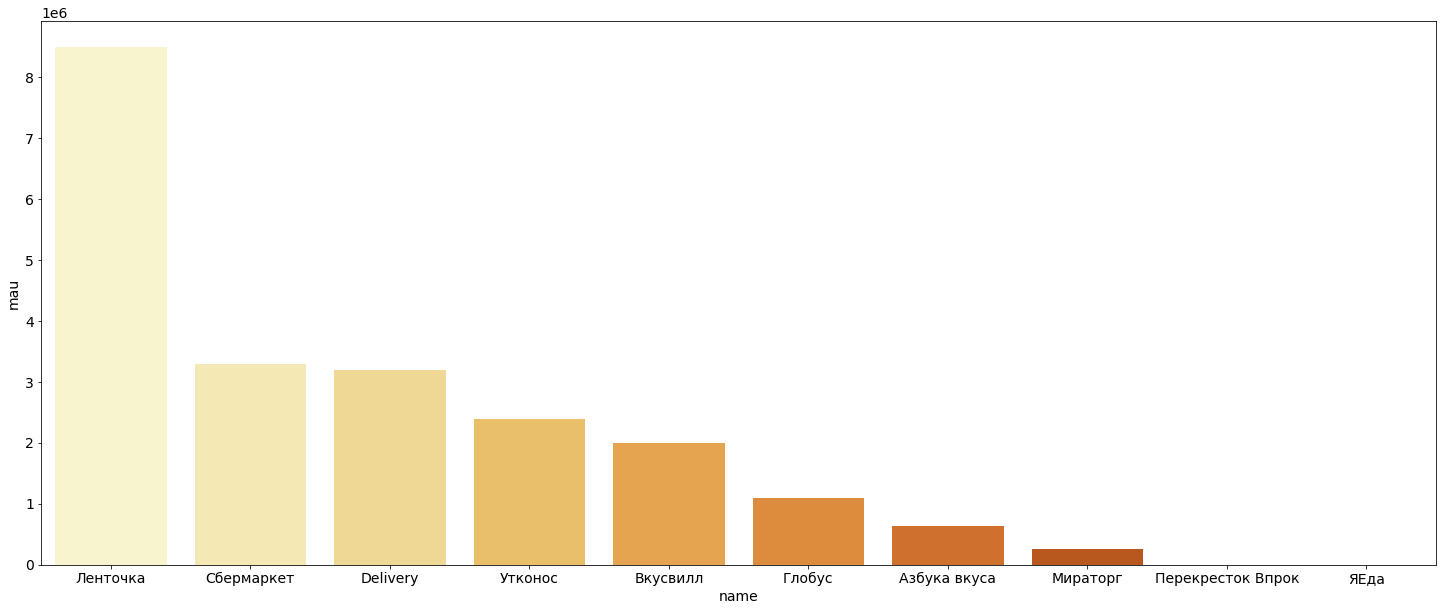

In [31]:
plt.figure(figsize=(25,10))

sns.barplot(x='name', y='mau', data = df[(df['possibility_of_order'] == 'order')].\
            sort_values(['mau'], ascending=[False]), palette='YlOrBr')
plt.show()

Мы видим, что вариантов, откуда можно заказать продукты не так уж и много: из 17 магазинов - только 10, много традиционных оффлайн магазинов, которые не полностью прошли цифровизацию.  

Можно заметить, что самая высокая посещаемость у магазина Лента - он относится к сегменту **econom_shops**, далее следуют Сбермаркет, Delivery Club - они относятся к сегменту **агрегатор доставок**. 

После идут Утконос и Вкусвилл - **high_middle_shops**.

#### Вывод
Важно заметить, что в первой пятерке лидеров только 1 магазин эконом класса, остальные относятся либо к ценовому сегменту выше среднего либо агрегаторы доставок

## Mobile 

### Теперь рассмотрим мобильные приложения 

In [32]:
df_mobile = df.copy()

Удалим столбец **possibility_of_order, mau**, так как нас интересуют только мобильные приложения

In [33]:
df_mobile = df_mobile.drop(['possibility_of_order', 'mau'], axis = 1)

Теперь наши данные выглядят так

In [34]:
df_mobile.reset_index(drop = True)

,name,app_store_rating,users_review,app_store_category,segment
0,Вкусвилл,4.7,25000,10,high_middle_shops
1,Утконос,4.7,12500,38,high_middle_shops
2,Перекресток,4.7,68000,4,high_middle_shops
3,Перекресток Впрок,4.8,34000,16,high_middle_shops
4,Азбука вкуса,3.4,1300,75,high_middle_shops
5,Глобус,4.4,4800,26,econom_shops
6,Мираторг,1.5,806,140,econom_shops
7,Пятерочка,4.2,11000,3,econom_shops
8,Пятерочка Доставка,4.6,9000,8,econom_shops
9,Магнит,4.5,26000,18,econom_shops


In [35]:
df_mobile = df_mobile.reset_index(drop = True)

#### App Store Rating 

In [36]:
df_mobile.groupby('app_store_rating').size()

app_store_rating
1.5    1
3.4    1
4.2    1
4.3    1
4.4    1
4.5    1
4.6    1
4.7    5
4.8    4
4.9    1
dtype: int64

Видим, что приложения работают над удовлетворенностью пользователей и в основном все оценки выше 4. 

Этот показатель говорит о **высокой конкуренции мобильных приложений в foodtech**.  

Также это говорит о том, что большинство компаний в первую очередь **развивают mobile, а не web-версию**.

In [37]:
df_mobile.sort_values(['app_store_rating'], ascending=[False])[['name', 'app_store_rating','app_store_category','users_review','segment']].reset_index(drop = True)

,name,app_store_rating,app_store_category,users_review,segment
0,Самокат,4.9,7,73000,fast_product_delivery
1,Сбермаркет,4.8,1,92000,fast_product_delivery
2,Delivery,4.8,2,409000,fast_product_delivery
3,Перекресток Впрок,4.8,16,34000,high_middle_shops
4,ЯЕда,4.8,6,210000,fast_product_delivery
5,Утконос,4.7,38,12500,high_middle_shops
6,Кухня на районе,4.7,19,15000,fast_product_delivery
7,Лавка,4.7,17,7700,fast_product_delivery
8,Вкусвилл,4.7,10,25000,high_middle_shops
9,Перекресток,4.7,4,68000,high_middle_shops


**Оценки ниже 4 баллов** только у Мираторг и Азбуки вкуса. Также у этих приложений **меньше всего пользовательских отзывов и они находятся дальше всех** в категории Food&Drink. 

Можно предположить, что Мираторг и Азбука вкуса нацелены на развитие сайтов, а не мобильных приложений.

In [38]:
df_mobile.sort_values(by = ['app_store_rating'], ascending=[False])\
        [['name','app_store_rating','app_store_category','users_review','segment']].reset_index(drop = True)[:10]

,name,app_store_rating,app_store_category,users_review,segment
0,Самокат,4.9,7,73000,fast_product_delivery
1,Сбермаркет,4.8,1,92000,fast_product_delivery
2,Delivery,4.8,2,409000,fast_product_delivery
3,Перекресток Впрок,4.8,16,34000,high_middle_shops
4,ЯЕда,4.8,6,210000,fast_product_delivery
5,Утконос,4.7,38,12500,high_middle_shops
6,Кухня на районе,4.7,19,15000,fast_product_delivery
7,Лавка,4.7,17,7700,fast_product_delivery
8,Вкусвилл,4.7,10,25000,high_middle_shops
9,Перекресток,4.7,4,68000,high_middle_shops


Наибольший рейтинг у агрегаторов доставок и магазинов сегмента выше среднего. В десятке лидеров нет магазинов эконом класса

#### Users Reviews App Store

In [39]:
df_mobile.sort_values(['users_review'], ascending=[False])[['name', 'users_review', 'app_store_category','app_store_rating','segment']].reset_index(drop = True)

,name,users_review,app_store_category,app_store_rating,segment
0,Delivery,409000,2,4.8,fast_product_delivery
1,ЯЕда,210000,6,4.8,fast_product_delivery
2,Сбермаркет,92000,1,4.8,fast_product_delivery
3,Самокат,73000,7,4.9,fast_product_delivery
4,Перекресток,68000,4,4.7,high_middle_shops
5,Перекресток Впрок,34000,16,4.8,high_middle_shops
6,Магнит,26000,18,4.5,econom_shops
7,Вкусвилл,25000,10,4.7,high_middle_shops
8,Кухня на районе,15000,19,4.7,fast_product_delivery
9,Утконос,12500,38,4.7,high_middle_shops


Видим, что **больше всего отзывов оставляют агрегаторам доставок. С большим отрывом лидерует Delivery Club.**  
А также тут всего 1 магазин из сегмента эконом - Магнит

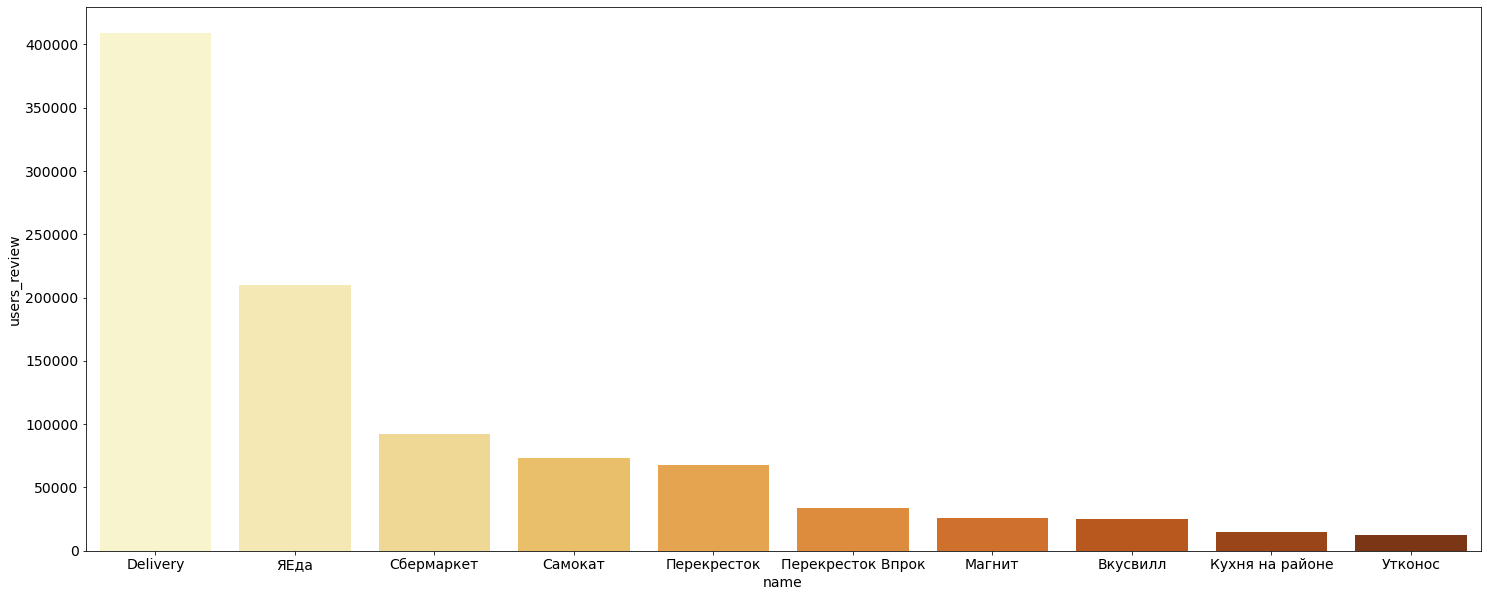

In [40]:
plt.figure(figsize=(25,10))

sns.barplot(x='name', y='users_review', data = df_mobile.sort_values(['users_review'], ascending=[False])[:10], palette='YlOrBr')
plt.show()

#### № App Store Rating & Users review

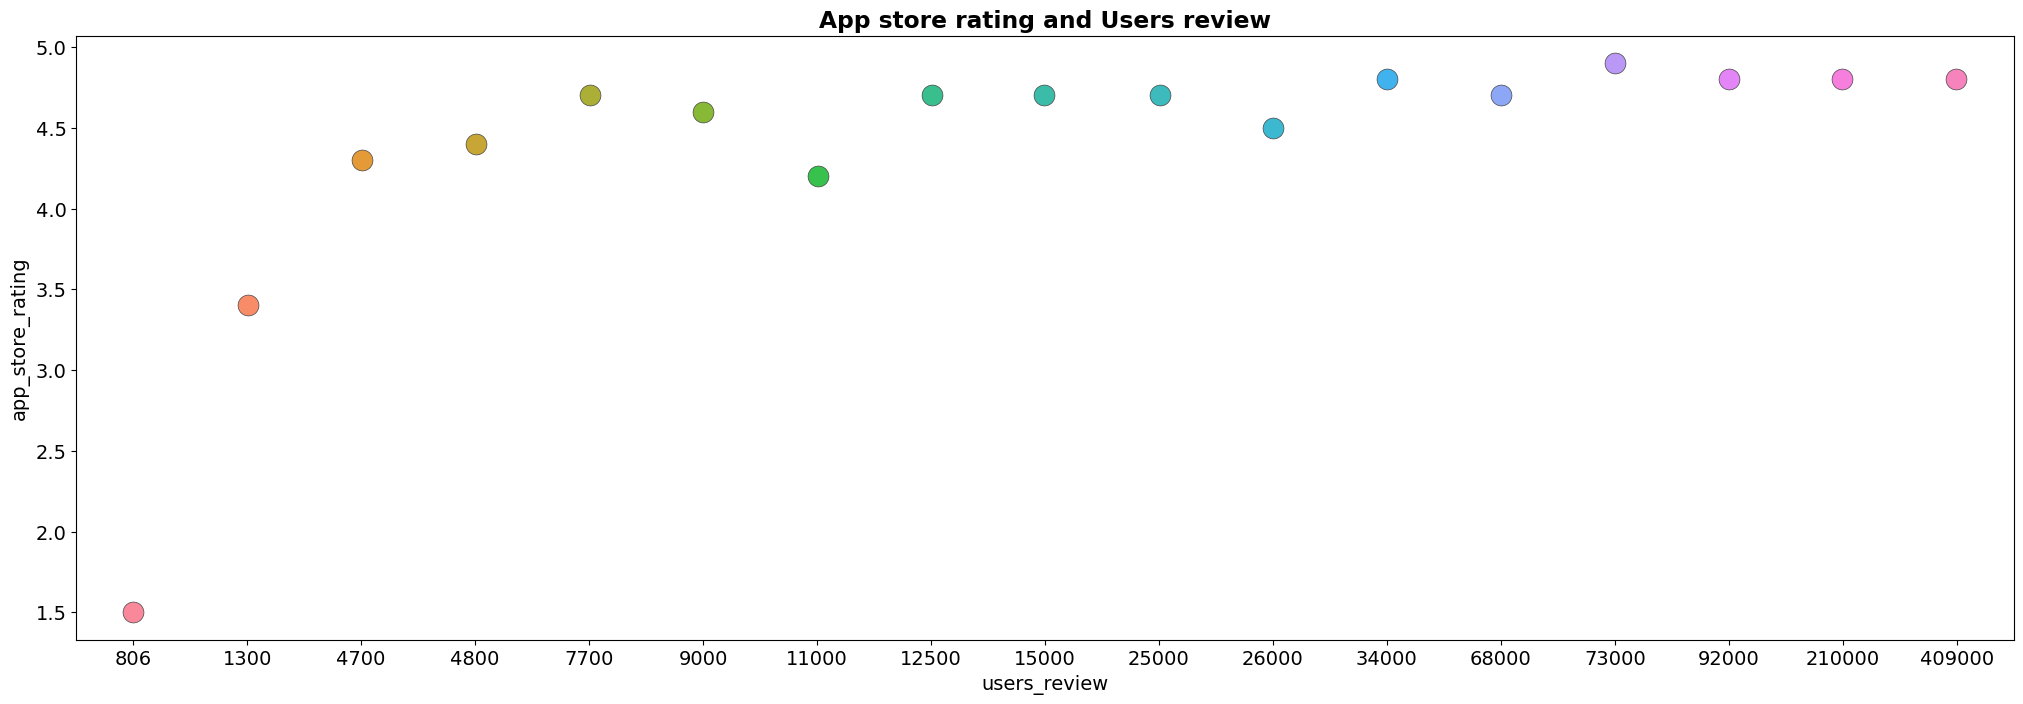

In [41]:
fig, ax = plt.subplots(figsize=(25,8), dpi=100)

plt.title('App store rating and Users review', weight='bold')

sns.stripplot(df['users_review'], df['app_store_rating'], jitter=0.01, size=15, ax=ax, linewidth=.5)
plt.show()

Чем больше пользователей оставляют отзывы о мобильном приложении, тем выше оценка. Скорее всего при бОльшем продвижении приложений, отстающие так же повысят свой рейтинг.

#### № App Store Category Food & Drink

In [42]:
df_mobile.sort_values(['app_store_category'], ascending=[True])[['name','app_store_category','users_review','app_store_rating','segment']].reset_index(drop = True)

,name,app_store_category,users_review,app_store_rating,segment
0,Сбермаркет,1,92000,4.8,fast_product_delivery
1,Delivery,2,409000,4.8,fast_product_delivery
2,Пятерочка,3,11000,4.2,econom_shops
3,Перекресток,4,68000,4.7,high_middle_shops
4,ЯЕда,6,210000,4.8,fast_product_delivery
5,Самокат,7,73000,4.9,fast_product_delivery
6,Пятерочка Доставка,8,9000,4.6,econom_shops
7,Вкусвилл,10,25000,4.7,high_middle_shops
8,Ленточка,11,4700,4.3,econom_shops
9,Перекресток Впрок,16,34000,4.8,high_middle_shops


**Лидируют снова сервисы-агрегаторы: Сбермаркет и Delivery.** 

Видим в первой десятке 3 магазина эконом сегмента с небольшим количеством отзывов и не самыми высокими рейтингами. Можем предположить, что Пятерочка, Пятерочка доставка и Ленточка только недавно выпустили приложения и исходя из активности пользователей App Store поднял приложения наверх.

## Website & Mobile

In [43]:
df

,name,mau,app_store_rating,users_review,app_store_category,segment,possibility_of_order
id,,,,,,,
1,Вкусвилл,2000000,4.7,25000,10,high_middle_shops,order
2,Утконос,2400000,4.7,12500,38,high_middle_shops,order
3,Перекресток,457600,4.7,68000,4,high_middle_shops,no_order
4,Перекресток Впрок,0,4.8,34000,16,high_middle_shops,order
5,Азбука вкуса,637300,3.4,1300,75,high_middle_shops,order
8,Глобус,1100000,4.4,4800,26,econom_shops,order
9,Мираторг,263800,1.5,806,140,econom_shops,order
10,Пятерочка,5200000,4.2,11000,3,econom_shops,no_order
11,Пятерочка Доставка,101500,4.6,9000,8,econom_shops,no_order


#### MAU & App store rating

Создадим новый датасет, в котором выберем магазины, где возможно сделать заказ с сайта и где известна посещаемость сайта.

In [44]:
df_new = df[(df['possibility_of_order'] == 'order') & (df['mau'] != 0)].\
        sort_values(by = ['mau'],\
        ascending=[False])[['name','mau','app_store_category', 'app_store_rating']].reset_index(drop = True)

In [45]:
df_new

,name,mau,app_store_category,app_store_rating
0,Ленточка,8500000,11,4.3
1,Сбермаркет,3300000,1,4.8
2,Delivery,3200000,2,4.8
3,Утконос,2400000,38,4.7
4,Вкусвилл,2000000,10,4.7
5,Глобус,1100000,26,4.4
6,Азбука вкуса,637300,75,3.4
7,Мираторг,263800,140,1.5


Построим график зависимости между пользовательским рейтингом и месячной посещаемости сайта

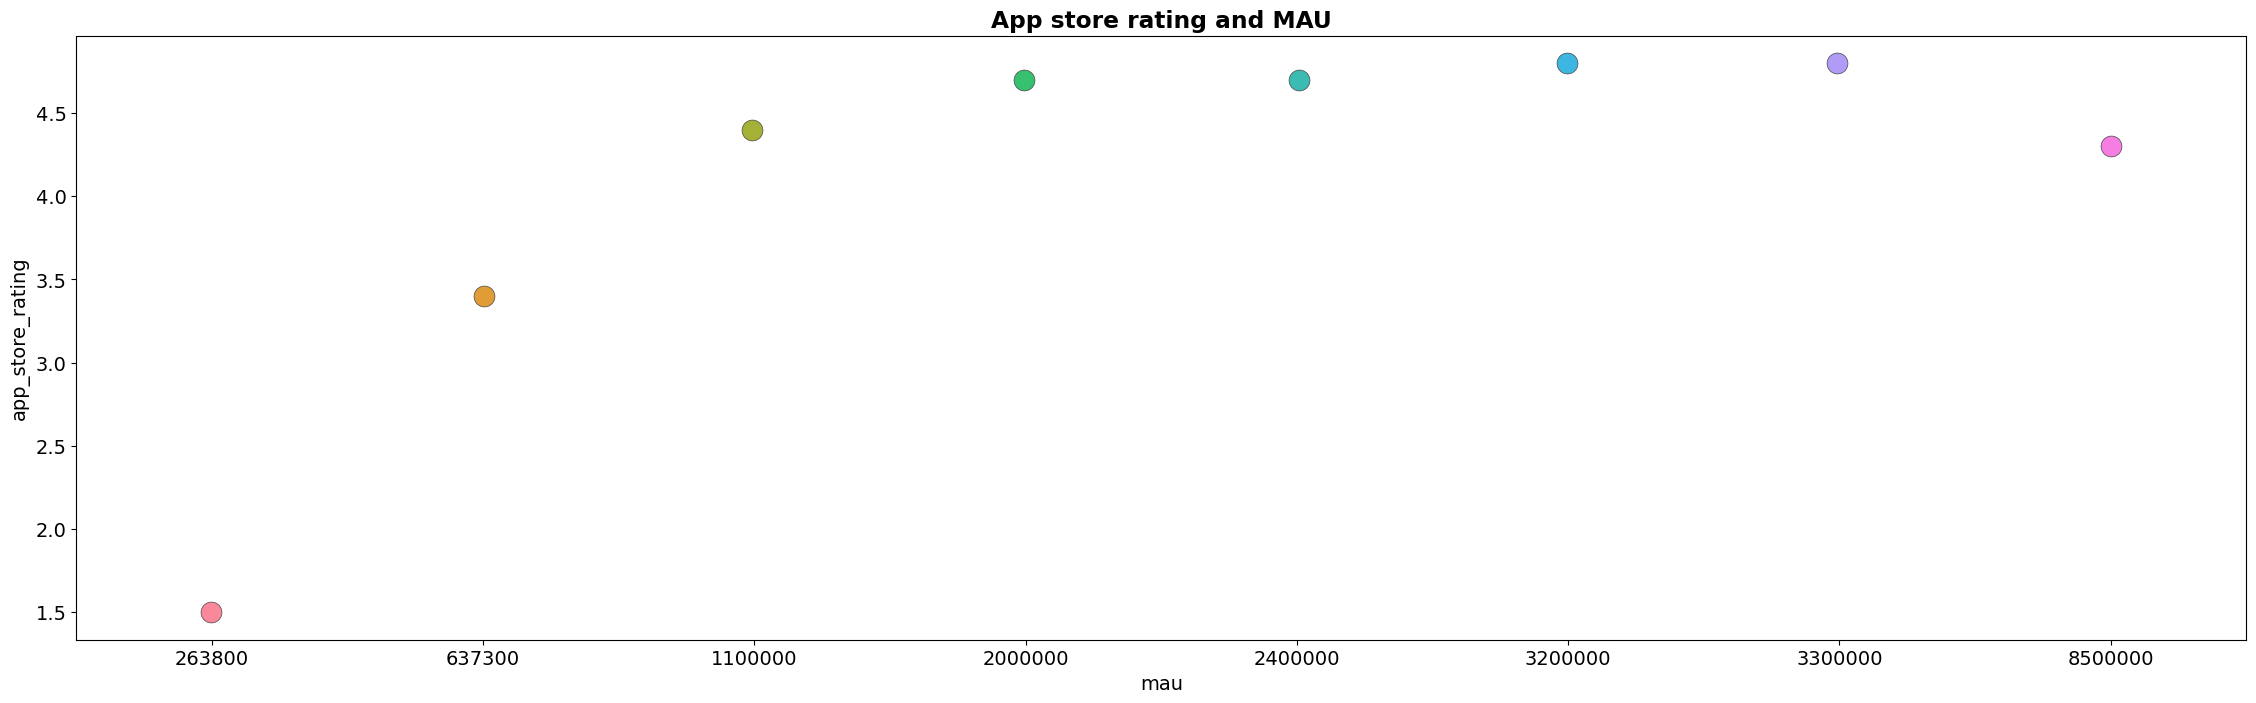

In [46]:
fig, ax = plt.subplots(figsize=(28,8), dpi=100)

plt.title('App store rating and MAU', weight='bold')

sns.stripplot(df_new['mau'], df_new['app_store_rating'], jitter=0.01, size=15, ax=ax, linewidth=.5)
plt.show()

Видим явную зависимость, чем выше рейтинг мобильного приложения, тем больше посещаемость самого сайта

## Выводы

1. Из 17 магазинов и сервисов, которые мы анализируем в данном отчете мы можем сделать заказ через сайт только в 10. Видим, что много традиционных магазинов еще не до конца прошли полную цифровую трансформацию.


2. У всех компаний есть работующие мобильные приложения.


3. В основном, если рассматривать рейтинг приложений, то все пользовательские оценки выше 4, если отбросить 2 приложения с низкими оценками (Азбука Вкуса, Мираторг). Этот показатель говорит о высокой конкуренции мобильных приложений в foodtech. 


4. Наибольший пользовательский рейтинг у агрегаторов доставок и магазинов сегмента выше среднего. В десятке лидеров нет магазинов эконом класса.  


5. Есть зависимость между рейтингом приложения и MAU сайта. Чем выше рейтинг мобильного приложения, тем больше посещаемость.


6. Больше всего отзывов оставляют агрегаторам доставок.


7. Есть зависимость между отзывами о мобильном приложении и пользовательской оценкой приложения. Чем больше пользователей оставляют отзывы о мобильном приложении, тем выше оценка.


8. В рейтинге категории Food & Drink лидируют сервисы-агрегаторы.


9. В рейтинге категории Food & Drink есть магазины с небольшим количеством отзывов и не самыми высокими рейтингами. Можем предположить, что это те магазины, которые только недавно выпустили приложения и находятся в рейтинге, исходя из активности пользователей.